<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 6 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import gc

In [2]:
data = pd.read_csv('diabetic_data.csv')

data.describe()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
def print_unique_elements(df, columns):
    for column in columns:
        try:
            print(f"\033[94m{column}\033[0m:")
            unique_counts = df[column].value_counts()
            i = 0
            for value, count in unique_counts.items():
                i = i + 1
                print(f"        \033[91m{value}\033[0m {count}")
        except KeyError:
            print(f"    Column '{column}' not found in the DataFrame.")

In [4]:
print (data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [5]:
data['admission_type_id'].replace([5,6,8], np.nan, inplace=True)
data['discharge_disposition_id'].replace([18,25,26], np.nan, inplace=True)
data['admission_source_id'].replace([9,15,17,20, 21], np.nan, inplace=True)

In [6]:

def print_missing_counts(df, null_values):
    for col in df.select_dtypes(include=['object']).columns:
        
        for val in null_values :
            count = df[col].value_counts().get(val, 0)
            if count > 0:
                print(f"The count of {val} in the column '{col}' is: {count} equals to {((count/df.shape[0])*100):.2f}% missing values.")

    nas = df.isna().sum()
    nas = nas[nas > 0]
    nas_percentage = nas / len(df) * 100
    for column in nas.index:
        print(f"{column}: Count = {nas[column]}, Percentage = {nas_percentage[column]:.2f}%")

print_missing_counts(data, ['?', 'Unknown/Invalid'])

The count of ? in the column 'race' is: 2273 equals to 2.23% missing values.
The count of Unknown/Invalid in the column 'gender' is: 3 equals to 0.00% missing values.
The count of ? in the column 'weight' is: 98569 equals to 96.86% missing values.
The count of ? in the column 'payer_code' is: 40256 equals to 39.56% missing values.
The count of ? in the column 'medical_specialty' is: 49949 equals to 49.08% missing values.
The count of ? in the column 'diag_1' is: 21 equals to 0.02% missing values.
The count of ? in the column 'diag_2' is: 358 equals to 0.35% missing values.
The count of ? in the column 'diag_3' is: 1423 equals to 1.40% missing values.
admission_type_id: Count = 10396, Percentage = 10.22%
discharge_disposition_id: Count = 4680, Percentage = 4.60%
admission_source_id: Count = 7067, Percentage = 6.94%
max_glu_serum: Count = 96420, Percentage = 94.75%
A1Cresult: Count = 84748, Percentage = 83.28%


In [7]:
print_unique_elements(data, ['tolbutamide'])

tolbutamide:
        No 101743
        Steady 23


In [8]:
no_missing = data[data['gender'] != 'Unknown/Invalid']
no_missing['gender'].unique()

array(['Female', 'Male'], dtype=object)

this fields have significant number of missing values and dosen't have high importance in data so we can ignore them .

In [9]:
no_missing = no_missing.drop(columns=['max_glu_serum', 'A1Cresult', 'payer_code', 'weight',  'medical_specialty'])

but medical_specialty has high importance in data so we imputed it despite significant number of missing values .

In [10]:
def drop_columns(df, distinct_percentage, value_proportion_percentage):
    for col in df.columns:
        if df[col].nunique() / len(df) > distinct_percentage:
            print(f'column {col} dropped cause it has more than {distinct_percentage * 100}% unique values!')
            df = df.drop(col, axis=1)

    for col in df.columns:
        if any((df[col].value_counts() / len(df)) > value_proportion_percentage):
            print(f'column {col} dropped cause it has a value by more than {value_proportion_percentage * 100}% proportion!')
            df = df.drop(col, axis=1)

    return df

no_missing = drop_columns(no_missing, 0.90, 0.99)
no_missing.info()

column encounter_id dropped cause it has more than 90.0% unique values!
column nateglinide dropped cause it has a value by more than 99.0% proportion!
column chlorpropamide dropped cause it has a value by more than 99.0% proportion!
column acetohexamide dropped cause it has a value by more than 99.0% proportion!
column tolbutamide dropped cause it has a value by more than 99.0% proportion!
column acarbose dropped cause it has a value by more than 99.0% proportion!
column miglitol dropped cause it has a value by more than 99.0% proportion!
column troglitazone dropped cause it has a value by more than 99.0% proportion!
column tolazamide dropped cause it has a value by more than 99.0% proportion!
column examide dropped cause it has a value by more than 99.0% proportion!
column citoglipton dropped cause it has a value by more than 99.0% proportion!
column glyburide-metformin dropped cause it has a value by more than 99.0% proportion!
column glipizide-metformin dropped cause it has a value 

In [11]:
no_missing = no_missing.replace('?', np.nan)

In [12]:
print_missing_counts(no_missing, ['?', 'Unknown/Invalid'])

race: Count = 2271, Percentage = 2.23%
admission_type_id: Count = 10396, Percentage = 10.22%
discharge_disposition_id: Count = 4680, Percentage = 4.60%
admission_source_id: Count = 7067, Percentage = 6.94%
diag_1: Count = 21, Percentage = 0.02%
diag_2: Count = 358, Percentage = 0.35%
diag_3: Count = 1423, Percentage = 1.40%


In [13]:
print_missing_counts(no_missing, ['?'])

race: Count = 2271, Percentage = 2.23%
admission_type_id: Count = 10396, Percentage = 10.22%
discharge_disposition_id: Count = 4680, Percentage = 4.60%
admission_source_id: Count = 7067, Percentage = 6.94%
diag_1: Count = 21, Percentage = 0.02%
diag_2: Count = 358, Percentage = 0.35%
diag_3: Count = 1423, Percentage = 1.40%


In [14]:
def label_encode(df):
    label_encoders = {}

    object_columns = df.select_dtypes(include=['object']).columns

    for column in object_columns:
        le = LabelEncoder()
        
        non_null_mask = df[column].notnull()
        non_null_values = df[column][non_null_mask]
        
        encoded_values = le.fit_transform(non_null_values)
        
        full_encoded = pd.Series(index=df[column].index, data=np.nan, dtype=float)
        
        full_encoded[non_null_mask] = encoded_values
        
        df[column] = full_encoded
        
        del full_encoded
        
        gc.collect()
        
        print(f"{column} labels: ", dict(zip(le.classes_, le.transform(le.classes_))))
        label_encoders[column] = le

    return df, label_encoders


In [15]:
no_missing , label_encoders = label_encode(no_missing)

race labels:  {'AfricanAmerican': 0, 'Asian': 1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4}
gender labels:  {'Female': 0, 'Male': 1}
age labels:  {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}
diag_1 labels:  {'10': 0, '11': 1, '110': 2, '112': 3, '114': 4, '115': 5, '117': 6, '131': 7, '133': 8, '135': 9, '136': 10, '141': 11, '142': 12, '143': 13, '145': 14, '146': 15, '147': 16, '148': 17, '149': 18, '150': 19, '151': 20, '152': 21, '153': 22, '154': 23, '155': 24, '156': 25, '157': 26, '158': 27, '160': 28, '161': 29, '162': 30, '163': 31, '164': 32, '170': 33, '171': 34, '172': 35, '173': 36, '174': 37, '175': 38, '179': 39, '180': 40, '182': 41, '183': 42, '184': 43, '185': 44, '187': 45, '188': 46, '189': 47, '191': 48, '192': 49, '193': 50, '194': 51, '195': 52, '196': 53, '197': 54, '198': 55, '199': 56, '200': 57, '201': 58, '202': 59, '203': 60, '204': 61, '205': 62, '207': 63, '208

In [16]:
cop = no_missing.copy()

In [17]:
def impute_missing_values(df, columns_with_missing):
    for column in columns_with_missing:
        print (f'Imputing {column}')
        gc.collect()
        target_column = column
        not_null_df = df[df[target_column].notnull()]
        null_df = df[df[target_column].isnull()]

        X_train = not_null_df.drop(target_column, axis=1)
        y_train = not_null_df[target_column]
        X_test = null_df.drop(target_column, axis=1)
        
        if not X_test.empty:
            model = RandomForestClassifier()
            model.fit(X_train, y_train)

            predictions = model.predict(X_test)
            df.loc[df[target_column].isnull(), target_column] = predictions
    return df

no_missing = impute_missing_values(no_missing, ['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
print_missing_counts(no_missing, ['?'])


Imputing race
Imputing admission_type_id
Imputing discharge_disposition_id
Imputing admission_source_id
diag_1: Count = 21, Percentage = 0.02%
diag_2: Count = 358, Percentage = 0.35%
diag_3: Count = 1423, Percentage = 1.40%


In [18]:
def impute_categorical_missing_values_knn(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)

    df_imputed = imputer.fit_transform(df)

    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

    return df_imputed

no_missing = impute_categorical_missing_values_knn(no_missing , 1)
print_missing_counts(no_missing, ['?'])


In [19]:
no_missing.drop_duplicates(subset=None, keep='first', inplace=True)

In [20]:
no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_nbr               101763 non-null  float64
 1   race                      101763 non-null  float64
 2   gender                    101763 non-null  float64
 3   age                       101763 non-null  float64
 4   admission_type_id         101763 non-null  float64
 5   discharge_disposition_id  101763 non-null  float64
 6   admission_source_id       101763 non-null  float64
 7   time_in_hospital          101763 non-null  float64
 8   num_lab_procedures        101763 non-null  float64
 9   num_procedures            101763 non-null  float64
 10  num_medications           101763 non-null  float64
 11  number_outpatient         101763 non-null  float64
 12  number_emergency          101763 non-null  float64
 13  number_inpatient          101763 non-null  f

now we try to detect outliers

In [21]:
def detect_outliers(df, n_estimators, contamination, random_state):
    print (f'in outlier detection n_estimators is {n_estimators} and the contamination is {contamination}')
    df_copy = df.copy()

    iso = IsolationForest(n_estimators=n_estimators, contamination=contamination ,random_state=random_state)

    outlier_label = iso.fit_predict(df_copy)

    df_copy['outlier'] = outlier_label

    df_outliers = df_copy[df_copy['outlier'] == -1]

    df_copy = df_copy[df_copy['outlier'] == 1]
    df_copy.drop('outlier', axis=1, inplace=True)

    return df_copy, df_outliers

df_no_outliers, df_outliers = detect_outliers(no_missing, 50, 0.05,42)


in outlier detection n_estimators is 50 and the contamination is 0.05


lets normalize the data.

In [22]:
def normalize_features(df):
    df_copy = df.copy()

    scaler = StandardScaler()

    df_normalized = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

    return df_normalized

df_normalized = normalize_features(df_no_outliers)


now lets go for dimentionality reduction step !

In [23]:
def apply_pca(df, variance_ratio, random_state):
    print(f'in pca the variance ratio is {variance_ratio}')
    df_copy = df.copy()

    pca = PCA(n_components=variance_ratio, random_state=random_state)

    df_pca = pd.DataFrame(pca.fit_transform(df_copy))
    
    if (variance_ratio < 1):
        print (f'pca dimontions after pca : {df_pca.shape[1]}')
    else: 
        print(f'Total explained variance: {sum(pca.explained_variance_ratio_)}')
    
    return df_pca

variance_ratio = 0.95  
df_pca = apply_pca(df_normalized, 3, 42)


in pca the variance ratio is 3
Total explained variance: 0.2184802459329942


In [24]:
num_dimensions = df_pca.shape[1]
print(f"The dimensionality of the data after PCA is: {num_dimensions}")

The dimensionality of the data after PCA is: 3


now let's implement the K-means clustering function.

In [25]:
def fit_kmeans(df, n_clusters, random_state):
    print (f'in k-means the n_clusters is {n_clusters}')
    df_copy = df.copy()

    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', init='k-means++', random_state=random_state)

    kmeans.fit(df_copy)

    df_copy['cluster'] = kmeans.labels_

    return df_copy, kmeans

n_clusters = 10
K_means_df , K_means_modle = fit_kmeans(df_pca , n_clusters, 42)

in k-means the n_clusters is 10


and also let's implement the DBScan clustering function

In [26]:
def fit_dbscan(df, eps, min_samples):
    df_copy = df.copy()

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    dbscan.fit(df_copy)

    df_copy['cluster'] = dbscan.labels_

    return df_copy, dbscan

eps = 0.1
min_samples = 10
dbscan_df , dbscan_modle = fit_dbscan(df_pca , eps, min_samples)


now lets fine best hyper parameters

now lets tune dbscan hyper parameters

In [27]:
class dbscan_pipe_hyper_parameter_tuner:
    
    def __init__(self, n_estimators, contamination, variance_ratio, eps, mean_samples, df, random_state):
        self.n_estimators = n_estimators
        self.contamination = contamination
        self.variance_ratio = variance_ratio
        self.eps = eps
        self.mean_samples = mean_samples
        self.df = df
        self.random_state=random_state
        
    def fit(self):
        df_no_outliers, df_outliers = detect_outliers(self.df, self.n_estimators, self.contamination, self.random_state)
        df_normalized = normalize_features(df_no_outliers)
        df_pca = apply_pca(df_normalized, self.variance_ratio, self.random_state)
        dbscan_df , dbscan_model = fit_dbscan(df_pca , self.eps, self.mean_samples)
        self.model = dbscan_model
        self.PCA_df = df_pca

In [28]:
class kmeans_pipe_hyper_parameter_tuner:
    
    def __init__(self, n_estimators, contamination, variance_ratio, n_clusters, df, random_state):
        self.n_estimators = n_estimators
        self.contamination = contamination
        self.variance_ratio = variance_ratio
        self.n_clusters = n_clusters
        self.df = df
        self.random_state=random_state
        
    def fit(self):
        df_no_outliers, df_outliers = detect_outliers(self.df, self.n_estimators, self.contamination, self.random_state)
        df_normalized = normalize_features(df_no_outliers)
        df_pca = apply_pca(df_normalized, variance_ratio = self.variance_ratio, random_state = self.random_state)
        K_means_df , K_means_modle = fit_kmeans(df_pca , n_clusters = self.n_clusters, random_state = self.random_state)
        self.model = K_means_modle
        self.PCA_df = df_pca
        self.labels_ = self.model.labels_

    def sample_silhouette_score(self, sample_percentage):
        unique_labels = np.unique(self.labels_)
        sample_indices = []

        for label in unique_labels:
            cluster_indices = np.where(self.labels_ == label)[0]
            sample_size = int(len(cluster_indices) * sample_percentage)
            if cluster_indices.size > 0:
                sample_indices.extend(np.random.choice(cluster_indices, size=min(sample_size, cluster_indices.size), replace=False))

        sample_labels = self.labels_[sample_indices]
        sample_data = self.PCA_df.reset_index(drop=True).iloc[sample_indices]

        return silhouette_score(sample_data, sample_labels)

    def cv_silhouette_score(self, sample_percentage, cv):
        scores = []
        for _ in range(cv):
            score = self.sample_silhouette_score(sample_percentage)
            scores.append(score)
        return np.mean(scores)

param_grid = {
    'n_estimators': [50,100],
    'contamination': [0.1, 0.15, 0.20],
    'variance_ratio': [3, 5],
    'n_clusters': [3, 4, 5, 6]
}

grid = ParameterGrid(param_grid)

best_score = -1
best_params = None

pbar = tqdm(total=len(grid), desc='Hyperparameter Tuning', ncols=80)

for params in grid:
    tuner = kmeans_pipe_hyper_parameter_tuner(**params, df=no_missing, random_state=1)
    tuner.fit()
    score = tuner.cv_silhouette_score(sample_percentage=0.1, cv=3)  # Adjust sample percentage and cv as needed

    print (f'for params {params} got the score of : {score}')

    if score > best_score:
        best_score = score
        best_params = params

    pbar.update()

pbar.close()

print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")


Hyperparameter Tuning:   0%|                             | 0/48 [00:00<?, ?it/s]

in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21643545865585934
in k-means the n_clusters is 3


Hyperparameter Tuning:   2%|▍                    | 1/48 [00:04<03:11,  4.07s/it]

for params {'contamination': 0.1, 'n_clusters': 3, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.2716506350324523
in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.31218017348763516
in k-means the n_clusters is 3


Hyperparameter Tuning:   4%|▉                    | 2/48 [00:08<03:08,  4.10s/it]

for params {'contamination': 0.1, 'n_clusters': 3, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.18723296034665418
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21658753487115595
in k-means the n_clusters is 3


Hyperparameter Tuning:   6%|█▎                   | 3/48 [00:12<03:13,  4.29s/it]

for params {'contamination': 0.1, 'n_clusters': 3, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.2711197000375222
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.3121099896002136
in k-means the n_clusters is 3


Hyperparameter Tuning:   8%|█▊                   | 4/48 [00:17<03:13,  4.39s/it]

for params {'contamination': 0.1, 'n_clusters': 3, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.18909814822077176
in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21643545865585934
in k-means the n_clusters is 4


Hyperparameter Tuning:  10%|██▏                  | 5/48 [00:21<03:03,  4.27s/it]

for params {'contamination': 0.1, 'n_clusters': 4, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.27865233753719104
in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.31218017348763516
in k-means the n_clusters is 4


Hyperparameter Tuning:  12%|██▋                  | 6/48 [00:25<02:55,  4.19s/it]

for params {'contamination': 0.1, 'n_clusters': 4, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.1811968004547798
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21658753487115595
in k-means the n_clusters is 4


Hyperparameter Tuning:  15%|███                  | 7/48 [00:29<02:56,  4.31s/it]

for params {'contamination': 0.1, 'n_clusters': 4, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.27675937967317893
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.3121099896002136
in k-means the n_clusters is 4


Hyperparameter Tuning:  17%|███▌                 | 8/48 [00:34<02:55,  4.39s/it]

for params {'contamination': 0.1, 'n_clusters': 4, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.18312693484628914
in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21643545865585934
in k-means the n_clusters is 5


Hyperparameter Tuning:  19%|███▉                 | 9/48 [00:38<02:46,  4.27s/it]

for params {'contamination': 0.1, 'n_clusters': 5, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.28482642362195715
in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.31218017348763516
in k-means the n_clusters is 5


Hyperparameter Tuning:  21%|████▏               | 10/48 [00:42<02:39,  4.21s/it]

for params {'contamination': 0.1, 'n_clusters': 5, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.18931627759926908
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21658753487115595
in k-means the n_clusters is 5


Hyperparameter Tuning:  23%|████▌               | 11/48 [00:47<02:39,  4.31s/it]

for params {'contamination': 0.1, 'n_clusters': 5, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.2831372200476498
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.3121099896002136
in k-means the n_clusters is 5


Hyperparameter Tuning:  25%|█████               | 12/48 [00:51<02:37,  4.38s/it]

for params {'contamination': 0.1, 'n_clusters': 5, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.1903360868559071
in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21643545865585934
in k-means the n_clusters is 6


Hyperparameter Tuning:  27%|█████▍              | 13/48 [00:55<02:29,  4.28s/it]

for params {'contamination': 0.1, 'n_clusters': 6, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.2778071411607981
in outlier detection n_estimators is 50 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.31218017348763516
in k-means the n_clusters is 6


Hyperparameter Tuning:  29%|█████▊              | 14/48 [00:59<02:24,  4.24s/it]

for params {'contamination': 0.1, 'n_clusters': 6, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.18678146087417047
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 3
Total explained variance: 0.21658753487115595
in k-means the n_clusters is 6


Hyperparameter Tuning:  31%|██████▎             | 15/48 [01:04<02:22,  4.31s/it]

for params {'contamination': 0.1, 'n_clusters': 6, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.2720280966135104
in outlier detection n_estimators is 100 and the contamination is 0.1
in pca the variance ratio is 5
Total explained variance: 0.3121099896002136
in k-means the n_clusters is 6


Hyperparameter Tuning:  33%|██████▋             | 16/48 [01:08<02:20,  4.38s/it]

for params {'contamination': 0.1, 'n_clusters': 6, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.18785688618321694
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21509175094445399
in k-means the n_clusters is 3


Hyperparameter Tuning:  35%|███████             | 17/48 [01:12<02:08,  4.16s/it]

for params {'contamination': 0.15, 'n_clusters': 3, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.2742115281155648
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.309716934368478
in k-means the n_clusters is 3


Hyperparameter Tuning:  38%|███████▌            | 18/48 [01:16<02:00,  4.01s/it]

for params {'contamination': 0.15, 'n_clusters': 3, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.18710703806453277
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21533462159792405
in k-means the n_clusters is 3


Hyperparameter Tuning:  40%|███████▉            | 19/48 [01:20<01:56,  4.02s/it]

for params {'contamination': 0.15, 'n_clusters': 3, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.23653234774077325
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.3099661142431217
in k-means the n_clusters is 3


Hyperparameter Tuning:  42%|████████▎           | 20/48 [01:24<01:53,  4.06s/it]

for params {'contamination': 0.15, 'n_clusters': 3, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.1602597557006705
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21509175094445399
in k-means the n_clusters is 4


Hyperparameter Tuning:  44%|████████▊           | 21/48 [01:27<01:46,  3.93s/it]

for params {'contamination': 0.15, 'n_clusters': 4, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.2845149967887511
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.309716934368478
in k-means the n_clusters is 4


Hyperparameter Tuning:  46%|█████████▏          | 22/48 [01:31<01:40,  3.86s/it]

for params {'contamination': 0.15, 'n_clusters': 4, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.1831141896002533
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21533462159792405
in k-means the n_clusters is 4


Hyperparameter Tuning:  48%|█████████▌          | 23/48 [01:35<01:38,  3.93s/it]

for params {'contamination': 0.15, 'n_clusters': 4, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.28375893917811407
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.3099661142431217
in k-means the n_clusters is 4


Hyperparameter Tuning:  50%|██████████          | 24/48 [01:39<01:35,  3.98s/it]

for params {'contamination': 0.15, 'n_clusters': 4, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.1802457450545435
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21509175094445399
in k-means the n_clusters is 5


Hyperparameter Tuning:  52%|██████████▍         | 25/48 [01:43<01:29,  3.89s/it]

for params {'contamination': 0.15, 'n_clusters': 5, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.28447172856441966
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.309716934368478
in k-means the n_clusters is 5


Hyperparameter Tuning:  54%|██████████▊         | 26/48 [01:47<01:24,  3.85s/it]

for params {'contamination': 0.15, 'n_clusters': 5, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.19058577694290513
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21533462159792405
in k-means the n_clusters is 5


Hyperparameter Tuning:  56%|███████████▎        | 27/48 [01:51<01:22,  3.91s/it]

for params {'contamination': 0.15, 'n_clusters': 5, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.28401800714330894
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.3099661142431217
in k-means the n_clusters is 5


Hyperparameter Tuning:  58%|███████████▋        | 28/48 [01:55<01:19,  3.96s/it]

for params {'contamination': 0.15, 'n_clusters': 5, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.17985073283880093
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21509175094445399
in k-means the n_clusters is 6


Hyperparameter Tuning:  60%|████████████        | 29/48 [01:59<01:17,  4.09s/it]

for params {'contamination': 0.15, 'n_clusters': 6, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.27515943882099925
in outlier detection n_estimators is 50 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.309716934368478
in k-means the n_clusters is 6


Hyperparameter Tuning:  62%|████████████▌       | 30/48 [02:04<01:16,  4.27s/it]

for params {'contamination': 0.15, 'n_clusters': 6, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.18687155118356338
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 3
Total explained variance: 0.21533462159792405
in k-means the n_clusters is 6


Hyperparameter Tuning:  65%|████████████▉       | 31/48 [02:09<01:15,  4.42s/it]

for params {'contamination': 0.15, 'n_clusters': 6, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.2641592498001359
in outlier detection n_estimators is 100 and the contamination is 0.15
in pca the variance ratio is 5
Total explained variance: 0.3099661142431217
in k-means the n_clusters is 6


Hyperparameter Tuning:  67%|█████████████▎      | 32/48 [02:13<01:11,  4.45s/it]

for params {'contamination': 0.15, 'n_clusters': 6, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.18769233098452454
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.2144116754180923
in k-means the n_clusters is 3


Hyperparameter Tuning:  69%|█████████████▊      | 33/48 [02:17<01:02,  4.14s/it]

for params {'contamination': 0.2, 'n_clusters': 3, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.27502784698625493
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30838774934757884
in k-means the n_clusters is 3


Hyperparameter Tuning:  71%|██████████████▏     | 34/48 [02:20<00:54,  3.93s/it]

for params {'contamination': 0.2, 'n_clusters': 3, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.1909957744111733
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333
in k-means the n_clusters is 3


Hyperparameter Tuning:  73%|██████████████▌     | 35/48 [02:24<00:51,  3.94s/it]

for params {'contamination': 0.2, 'n_clusters': 3, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.27886062503435255
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535
in k-means the n_clusters is 3


Hyperparameter Tuning:  75%|███████████████     | 36/48 [02:28<00:46,  3.91s/it]

for params {'contamination': 0.2, 'n_clusters': 3, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.19202503039286234
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.2144116754180923
in k-means the n_clusters is 4


Hyperparameter Tuning:  77%|███████████████▍    | 37/48 [02:31<00:41,  3.75s/it]

for params {'contamination': 0.2, 'n_clusters': 4, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.2861697857310425
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30838774934757884
in k-means the n_clusters is 4


Hyperparameter Tuning:  79%|███████████████▊    | 38/48 [02:35<00:36,  3.65s/it]

for params {'contamination': 0.2, 'n_clusters': 4, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.18330020318819149
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333
in k-means the n_clusters is 4


Hyperparameter Tuning:  81%|████████████████▎   | 39/48 [02:39<00:33,  3.71s/it]

for params {'contamination': 0.2, 'n_clusters': 4, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.28632485378435696
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535
in k-means the n_clusters is 4


Hyperparameter Tuning:  83%|████████████████▋   | 40/48 [02:42<00:29,  3.74s/it]

for params {'contamination': 0.2, 'n_clusters': 4, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.1872658034928645
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.2144116754180923
in k-means the n_clusters is 5


Hyperparameter Tuning:  85%|█████████████████   | 41/48 [02:46<00:25,  3.63s/it]

for params {'contamination': 0.2, 'n_clusters': 5, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.28713696867277655
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30838774934757884
in k-means the n_clusters is 5


Hyperparameter Tuning:  88%|█████████████████▌  | 42/48 [02:49<00:21,  3.58s/it]

for params {'contamination': 0.2, 'n_clusters': 5, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.19124881734132929
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333
in k-means the n_clusters is 5


Hyperparameter Tuning:  90%|█████████████████▉  | 43/48 [02:53<00:18,  3.67s/it]

for params {'contamination': 0.2, 'n_clusters': 5, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.28601461985103566
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535
in k-means the n_clusters is 5


Hyperparameter Tuning:  92%|██████████████████▎ | 44/48 [02:57<00:14,  3.74s/it]

for params {'contamination': 0.2, 'n_clusters': 5, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.19316848268441142
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.2144116754180923
in k-means the n_clusters is 6


Hyperparameter Tuning:  94%|██████████████████▊ | 45/48 [03:00<00:10,  3.64s/it]

for params {'contamination': 0.2, 'n_clusters': 6, 'n_estimators': 50, 'variance_ratio': 3} got the score of : 0.26037060276007096
in outlier detection n_estimators is 50 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30838774934757884
in k-means the n_clusters is 6


Hyperparameter Tuning:  96%|███████████████████▏| 46/48 [03:04<00:07,  3.57s/it]

for params {'contamination': 0.2, 'n_clusters': 6, 'n_estimators': 50, 'variance_ratio': 5} got the score of : 0.19162577324747723
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333
in k-means the n_clusters is 6


Hyperparameter Tuning:  98%|███████████████████▌| 47/48 [03:08<00:03,  3.66s/it]

for params {'contamination': 0.2, 'n_clusters': 6, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.2742946370826153
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535
in k-means the n_clusters is 6


Hyperparameter Tuning: 100%|████████████████████| 48/48 [03:12<00:00,  4.00s/it]

for params {'contamination': 0.2, 'n_clusters': 6, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.19155407513494283
Best score: 0.28713696867277655
Best parameters: {'contamination': 0.2, 'n_clusters': 5, 'n_estimators': 50, 'variance_ratio': 3}


In [29]:
gc.collect()
tuner = kmeans_pipe_hyper_parameter_tuner(contamination=0.2, n_clusters=4, n_estimators= 100, variance_ratio=3, df=no_missing, random_state=1)
tuner.fit()
score = silhouette_score(tuner.PCA_df, tuner.model.labels_)
print (score)

in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333
in k-means the n_clusters is 4
0.28765961947273444


In [30]:
class dbscan_pipe_hyper_parameter_tuner:
    
    def __init__(self, n_estimators, contamination, variance_ratio, eps , min_samples, df, random_state):
        self.n_estimators = n_estimators
        self.contamination = contamination
        self.variance_ratio = variance_ratio
        self.eps = eps
        self.df = df
        self.random_state=random_state
        self.min_samples = min_samples
        
    def fit(self):
        df_no_outliers, df_outliers = detect_outliers(self.df, self.n_estimators, self.contamination, self.random_state)
        df_normalized = normalize_features(df_no_outliers)
        df_pca = apply_pca(df_normalized, variance_ratio = self.variance_ratio, random_state = self.random_state)
        K_means_df , K_means_modle = fit_dbscan(eps= self.eps, min_samples= self.min_samples, df = df_pca)
        self.model = K_means_modle
        self.PCA_df = df_pca
        self.labels_ = self.model.labels_

    def sample_silhouette_score(self, sample_percentage):
        unique_labels = np.unique(self.labels_)
        if len(unique_labels) < 2:
            return -1

        sample_indices = []
        for label in unique_labels:
            cluster_indices = np.where(self.labels_ == label)[0]
            sample_size = int(len(cluster_indices) * sample_percentage)
            if cluster_indices.size > 0:
                sample_indices.extend(np.random.choice(cluster_indices, size=min(sample_size, cluster_indices.size), replace=False))

        sample_labels = self.labels_[sample_indices]
        sample_data = self.PCA_df.reset_index(drop=True).iloc[sample_indices]

        return silhouette_score(sample_data, sample_labels)

    def cv_silhouette_score(self, sample_percentage, cv):
        scores = []
        for _ in range(cv):
            score = self.sample_silhouette_score(sample_percentage)
            scores.append(score)
        return np.mean(scores)

param_grid = {
    'n_estimators': [100],
    'contamination': [0.20],
    'variance_ratio': [3, 5],
    'eps': [0.6, 0.7, 0.8, 0.9],
    'min_samples': [5, 10, 15, 20, 25]
}

grid = ParameterGrid(param_grid)

best_score = -1
best_params = None

pbar = tqdm(total=len(grid), desc='Hyperparameter Tuning', ncols=80)

for params in grid:
    tuner = dbscan_pipe_hyper_parameter_tuner(**params, df=no_missing, random_state=1)
    tuner.fit()
    score = tuner.cv_silhouette_score(sample_percentage=0.1, cv=3)  # Adjust sample percentage and cv as needed

    print (f'for params {params} got the score of : {score}')

    if score > best_score:
        best_score = score
        best_params = params

    pbar.update()

pbar.close()

print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")


Hyperparameter Tuning:   0%|                             | 0/40 [00:00<?, ?it/s]

in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:   2%|▌                    | 1/40 [00:09<05:57,  9.16s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.4193274726745054
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:   5%|█                    | 2/40 [00:17<05:19,  8.40s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.10007440765068897
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:   8%|█▌                   | 3/40 [00:25<05:17,  8.58s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.40459975139488247
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  10%|██                   | 4/40 [00:33<04:58,  8.28s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 5} got the score of : -0.14758350682957022
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  12%|██▋                  | 5/40 [00:42<04:55,  8.45s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.42493682559276236
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  15%|███▏                 | 6/40 [00:50<04:39,  8.23s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 5} got the score of : -0.036440900726839955
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  18%|███▋                 | 7/40 [00:58<04:34,  8.33s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.40696148132446314
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  20%|████▏                | 8/40 [01:06<04:19,  8.11s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 5} got the score of : -0.032681418248130166
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  22%|████▋                | 9/40 [01:15<04:16,  8.27s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.39432963662610426
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  25%|█████               | 10/40 [01:22<04:03,  8.10s/it]

for params {'contamination': 0.2, 'eps': 0.6, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.06079165833671085
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  28%|█████▌              | 11/40 [01:32<04:09,  8.62s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.40918840519978605
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  30%|██████              | 12/40 [01:41<04:02,  8.67s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.27579317533374104
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  32%|██████▌             | 13/40 [01:51<04:02,  9.00s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.4357057599170903
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  35%|███████             | 14/40 [01:59<03:52,  8.93s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.2490949406014998
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  38%|███████▌            | 15/40 [02:09<03:49,  9.19s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.3968928880669072
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  40%|████████            | 16/40 [02:18<03:37,  9.06s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.09979932915025318
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  42%|████████▌           | 17/40 [02:28<03:32,  9.25s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.3978759805912399
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  45%|█████████           | 18/40 [02:36<03:20,  9.12s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.0660283463748719
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  48%|█████████▌          | 19/40 [02:46<03:15,  9.29s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.39755724328105496
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  50%|██████████          | 20/40 [02:55<03:02,  9.10s/it]

for params {'contamination': 0.2, 'eps': 0.7, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.06952518505785056
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  52%|██████████▌         | 21/40 [03:06<03:04,  9.73s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.44726625788402496
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  55%|███████████         | 22/40 [03:16<02:56,  9.83s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.3480954610356608
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  57%|███████████▌        | 23/40 [03:27<02:53, 10.18s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.441332894525162
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  60%|████████████        | 24/40 [03:37<02:42, 10.17s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.30592370217899717
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  62%|████████████▌       | 25/40 [03:48<02:36, 10.42s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.455114454161693
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  65%|█████████████       | 26/40 [03:58<02:24, 10.32s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.26919480463349726
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  68%|█████████████▌      | 27/40 [04:09<02:17, 10.57s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.4346078984667856
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  70%|██████████████      | 28/40 [04:19<02:05, 10.44s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.2609276143718955
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  72%|██████████████▌     | 29/40 [04:32<02:00, 10.97s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.4426292861609921
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  75%|███████████████     | 30/40 [04:42<01:47, 10.72s/it]

for params {'contamination': 0.2, 'eps': 0.8, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.18606513416230144
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  78%|███████████████▌    | 31/40 [04:54<01:41, 11.25s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.47080953052997726
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  80%|████████████████    | 32/40 [05:06<01:30, 11.37s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.380632214710282
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  82%|████████████████▌   | 33/40 [05:19<01:22, 11.72s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.46051101837761027
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  85%|█████████████████   | 34/40 [05:30<01:09, 11.67s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 10, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.36953972142478
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  88%|█████████████████▌  | 35/40 [05:43<00:59, 11.94s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.4404805368960869
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  90%|██████████████████  | 36/40 [05:54<00:47, 11.80s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 15, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.34491694764094355
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  92%|██████████████████▌ | 37/40 [06:07<00:36, 12.10s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.4253606303048855
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning:  95%|███████████████████ | 38/40 [06:18<00:23, 11.91s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 20, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.3233341507886332
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333


Hyperparameter Tuning:  98%|███████████████████▌| 39/40 [06:31<00:12, 12.06s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 3} got the score of : 0.4338148598456053
in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 5
Total explained variance: 0.30790231019813535


Hyperparameter Tuning: 100%|████████████████████| 40/40 [06:43<00:00, 10.08s/it]

for params {'contamination': 0.2, 'eps': 0.9, 'min_samples': 25, 'n_estimators': 100, 'variance_ratio': 5} got the score of : 0.29888331971743676
Best score: 0.47080953052997726
Best parameters: {'contamination': 0.2, 'eps': 0.9, 'min_samples': 5, 'n_estimators': 100, 'variance_ratio': 3}


In [31]:
gc.collect()
tuner = dbscan_pipe_hyper_parameter_tuner(contamination=0.2, min_samples=10, n_estimators= 100, variance_ratio=3, eps=0.6, df=no_missing, random_state=1)
tuner.fit()
score = silhouette_score(tuner.PCA_df, tuner.model.labels_)
print (score)

in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333
0.41579320006375015


In [32]:
gc.collect()
tuner = dbscan_pipe_hyper_parameter_tuner(contamination=0.2, min_samples=5, n_estimators= 100, variance_ratio=3, eps=0.6, df=no_missing, random_state=1)
tuner.fit()
score = silhouette_score(tuner.PCA_df, tuner.model.labels_)
print (score)

in outlier detection n_estimators is 100 and the contamination is 0.2
in pca the variance ratio is 3
Total explained variance: 0.214090036941333
0.4194570995296183


## Questions:
### Question 1:
- At first, we drops the fields 'max_glu_serum', 'A1Cresult', 'payer_code', 'weight', 'medical_specialty' due to the high percentage of missing rows.
- Then we replace IDs that were mapped to missing or invalid values with np.nan based on the IDs_mapping.csv file.
- Then we delete all the fields that have a different value above 90% and the fields whose one value is above 99% of all the values of this field.
- Then we impute all the fields that still have missing values.
- Then we label all the categorical fields.
- Then we detect the outliers and remove them.
- Then we normalize the data and then apply PCA on it.

### Question 2:
In the dimensionality reduction process, we used Principal Component Analysis (PCA) to reduce the original dataset from 26 variables to 3 principal components. These 3 components explain 21% of the total variance in the dataset.

The decision to reduce to 3 components was based on a trade-off between complexity and explained variance. While these 3 components only explain 21% of the variance, reducing the number of variables from 26 to 3 significantly simplifies our models and computations, making them more efficient to run and easier to interpret.

### Question 4 and 5:
For both algorithms, we make a pipe of outlier detection normalizer and PCA and algorithm, and then perform hypertuning on this grid search aid pipe.

### Question 6:
**``K-Means``**:
- Data Segmentation:
K-Means is commonly used for segmenting data into distinct groups based on similarity.
For example, in customer segmentation, you can group customers based on purchasing behavior, demographics, or other features.
- Image Compression:
K-Means can reduce the number of colors in an image by clustering similar pixel values.
It’s useful for compressing images while preserving essential features.
- Anomaly Detection:
By considering points far from cluster centers as anomalies, K-Means can help detect outliers.
For instance, identifying fraudulent transactions in financial data.

- Feature Engineering:
K-Means can be part of feature engineering by creating new features based on cluster assignments.
These features can improve the performance of downstream models.

**``DBSCAN``**:
- Noise Handling:
DBSCAN excels at handling noisy data points.
It doesn’t force every point into a cluster, allowing for more flexibility.

- Discovering Arbitrary Shapes:
Unlike K-Means, DBSCAN can find clusters of arbitrary shapes (not just spherical).
Useful when clusters have irregular boundaries.
- Density-Based Clustering:
DBSCAN focuses on dense regions, which aligns with real-world data distribution.
It’s effective for spatial data, such as geographical points.

- Outlier Detection:
Points not assigned to any cluster are considered outliers.
DBSCAN can identify these outliers effectively.


100%|██████████| 8/8 [14:38<00:00, 109.76s/it]


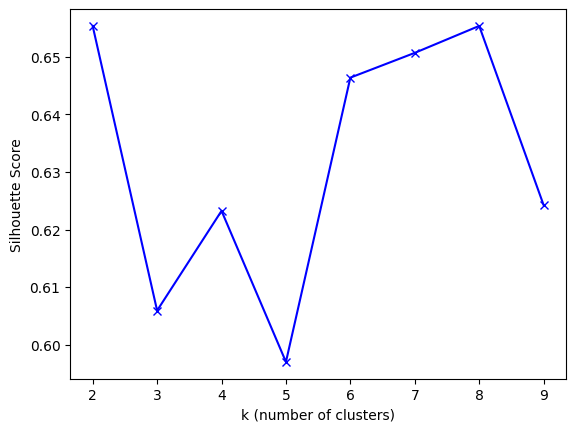

In [35]:
silhouette_scores = [] 
k_values = list(range(2, 10)) 

for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k , n_init='auto', init='k-means++')
    kmeans.fit(no_missing)
    score = silhouette_score(no_missing, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.show()


100%|██████████| 5/5 [09:12<00:00, 110.46s/it]


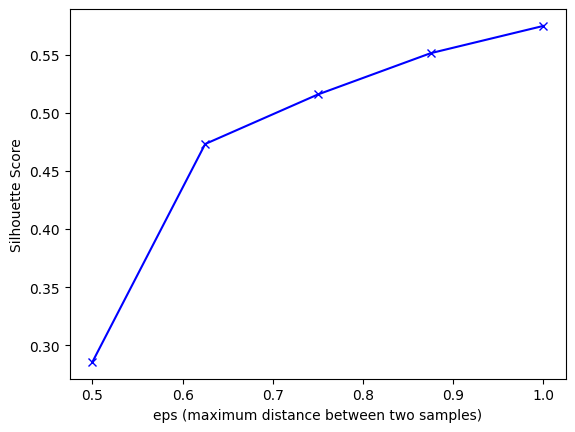

In [36]:
silhouette_scores = [] 
eps_values = np.linspace(0.5, 1, 5) 

for eps in tqdm(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(df_pca)
    if len(set(dbscan.labels_)) > 1:
        score = silhouette_score(df_pca, dbscan.labels_)
    else:
        score = -1 
    silhouette_scores.append(score)

plt.plot(eps_values, silhouette_scores, 'bx-')
plt.xlabel('eps (maximum distance between two samples)')
plt.ylabel('Silhouette Score')
plt.show()
